In [1]:
# code for question 1
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.integrate import odeint


In [23]:
beta = 0.6
N = 8468000
gamma = 0.23
ve = 0.0005

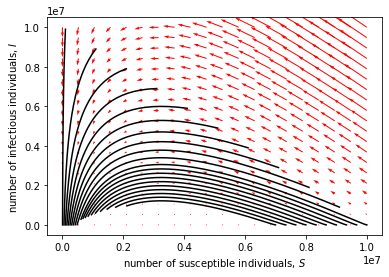

In [25]:

def f(Y, t):
    s,i = Y
    return [ -beta*i*s/N-ve*s,beta*i*s/N-gamma*i]

y1 = np.linspace(0, 1e7, 20)
y2 = np.linspace(0, 1e7, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')
for y20 in [1e7-i*1e4 for i in range(10,1001,100)]:
    tspan = np.linspace(0, 38, 200)
    y0 = [1e7-y20,y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'black') # path
    plt.plot(ys[0,0], ys[0,1], 'green') # start
    plt.plot(ys[-1,0], ys[-1,1], 'blue') # end

for x20 in np.linspace(7e6,1e7,10):
    tspan = np.linspace(0, 35, 200)
    y0 = [x20,2900]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'black') # path
    plt.plot(ys[0,0], ys[0,1], 'green') # start
    plt.plot(ys[-1,0], ys[-1,1], 'blue') # end

plt.ylabel('number of infectious individuals, $I$')
plt.xlabel('number of susceptible individuals, $S$')
plt.savefig('phase_plane.svg', format='svg', dpi=1200)